In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

Data from Database: https://drive.google.com/file/d/1yMO_Fj5i4oVp_dO0J2l1XzqJfFsrmVyl/view?usp=drive_link

In [22]:
conn = sqlite3.connect('/content/drive/MyDrive/for jobs/GG Colab/Real example DA with Python/sakila.db')

In [23]:
df = pd.read_sql('''
  select
    rental.rental_id
    , rental.rental_date
    , rental.return_date
    , customer.last_name as customer_lastname
    , store.store_id
    , city.city as rental_store_city
    , film.title as film_title
    , film.rental_duration as film_rental_duration
    , film.rental_rate as film_rental_rate
    , film.replacement_cost as film_replacement_cost
    , film.rating as film_rating
  from rental
  inner join customer on rental.customer_id == customer.customer_id
  inner join inventory on rental.inventory_id == inventory.inventory_id
  inner join store on inventory.store_id == store.store_id
  inner join address on store.address_id == address.address_id
  inner join city on address.city_id == city.city_id
  inner join film on inventory.film_id == film.film_id
  ;
''', conn, index_col = 'rental_id', parse_dates=['rental_date', 'return_date'])

In [24]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [25]:
df.shape

(16044, 10)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [27]:
df.describe()

,rental_date,return_date,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044,15861,16044.000000,16044.00000,16044.000000,16044.000000
mean,2005-07-23 08:12:53.217526912,2005-07-25 23:58:03.138768128,1.506171,4.93549,2.942630,20.215443
min,2005-05-24 22:53:30,2005-05-25 23:55:21,1.000000,3.00000,0.990000,9.990000
25%,2005-07-07 00:58:40.500000,2005-07-10 15:49:36,1.000000,4.00000,0.990000,14.990000
50%,2005-07-28 16:04:32.500000,2005-08-01 19:45:29,2.000000,5.00000,2.990000,20.990000
75%,2005-08-17 21:16:23,2005-08-20 23:35:55,2.000000,6.00000,4.990000,25.990000
max,2006-02-14 15:16:03,2005-09-02 02:35:22,2.000000,7.00000,4.990000,29.990000
std,NaN,NaN,0.499978,1.40169,1.649678,6.081771


##NUMERICAL ANALYSIS AND VISUALIZATION

In [28]:
df['film_rental_rate'].describe()

,film_rental_rate
count,16044.000000
mean,2.942630
std,1.649678
min,0.990000
25%,0.990000
50%,2.990000
75%,4.990000
max,4.990000


<Axes: >

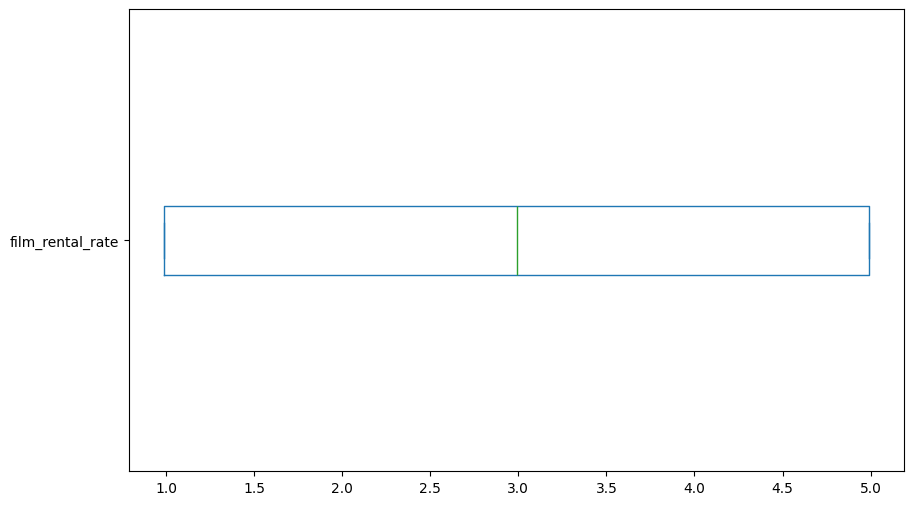

In [29]:
df['film_rental_rate'].plot(kind='box', vert=False, figsize=(10,6))

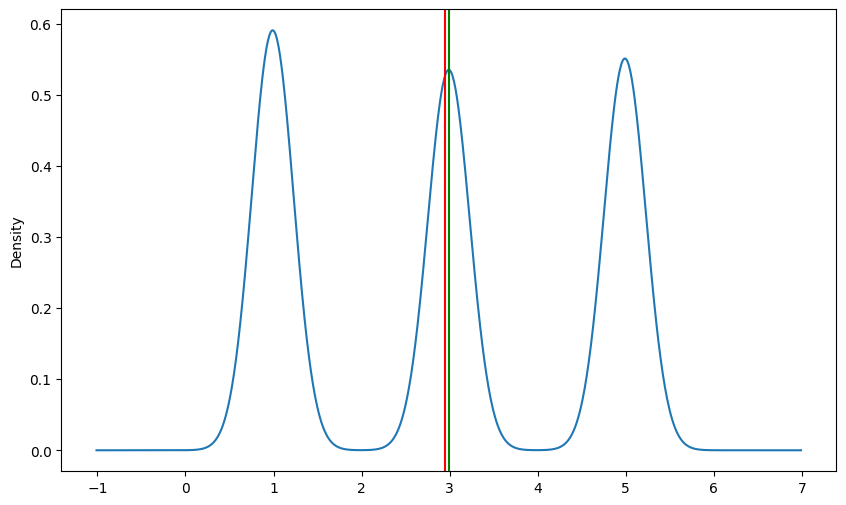

In [30]:
az = df['film_rental_rate'].plot(kind='density', figsize=(10,6))
az.axvline((df['film_rental_rate']).mean(), color='red')
az.axvline((df['film_rental_rate']).median(), color='green')

##CATEGORICAL ANALYSIS AND VISUALIZATION

In [33]:
df['rental_store_city'].value_counts()

,count
rental_store_city,
Woodridge,8121
Lethbridge,7923


<Axes: ylabel='count'>

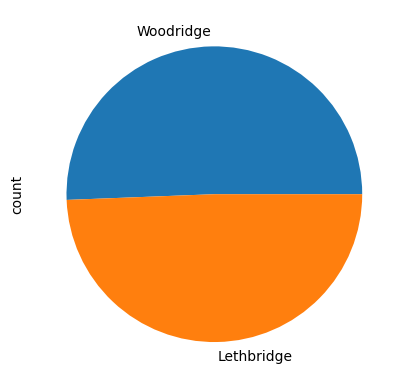

In [34]:
df['rental_store_city'].value_counts().plot(kind='pie')

##COLUMN WRANGLING

Calculate Rental Return Rate: rental_gain_return = (film_rental_rate/film_replacement_cost)*100

In [38]:
df['rental_gain_return'] = (df['film_rental_rate']/df['film_replacement_cost'])*100
df['rental_gain_return'].head()

,rental_gain_return
rental_id,
1,13.597090
2,17.598587
3,19.946631
4,4.502046
5,9.969990


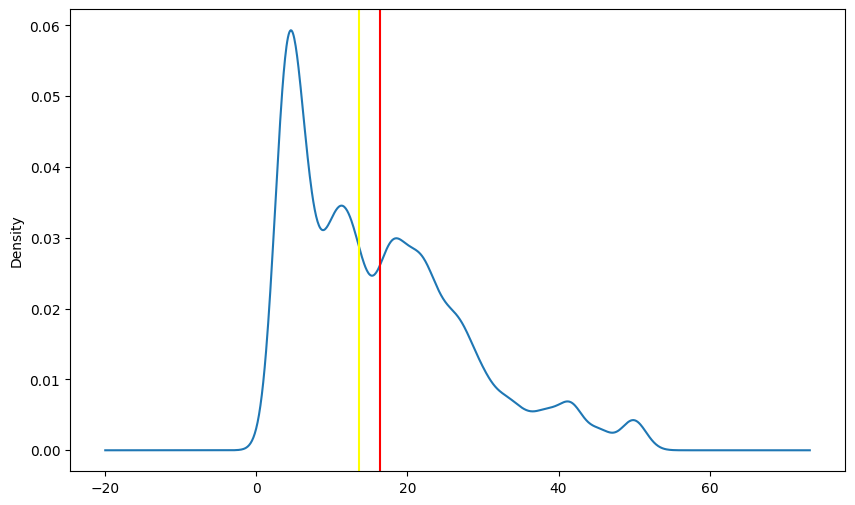

In [42]:
ast = df['rental_gain_return'].plot(kind='density', figsize=(10,6))
ast.axvline(df['rental_gain_return'].mean(), color = 'red')
ast.axvline(df['rental_gain_return'].median(), color = 'yellow')

In [49]:
med = round(df['rental_gain_return'].median(), 2) # giá trị trung vị của tỷ lệ film_rental_rate/flim_replacement_rate
print(f'Each rental represents',med, '% of film cost.')

Each rental represents 13.6 % of film cost.


In [54]:
f_times = round(100/13.6, 2)
print(f'So', f_times,'rentals are needed to recover film market price')

So 7.35 rentals are needed to recover film market price


In [57]:
r_times = round (df['film_title'].value_counts().mean())
print(f'While in average each film is rented', r_times, 'times.')

While in average each film is rented 17 times.


##SELECTION AND INDEXING

Get the rental records of the customer with lastname HANSEN

In [59]:
df.loc[(df['customer_lastname']== 'HANSEN')].head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return
rental_id,,,,,,,,,,,
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990
134,2005-05-25 21:48:41,2005-06-02 18:28:41,HANSEN,2,Woodridge,JUMPING WRATH,4,0.99,18.99,NC-17,5.213270
416,2005-05-27 15:02:10,2005-05-29 10:34:10,HANSEN,2,Woodridge,LESSON CLEOPATRA,3,0.99,28.99,NC-17,3.414971
809,2005-05-29 19:10:20,2005-06-05 19:05:20,HANSEN,2,Woodridge,INDIAN LOVE,4,0.99,26.99,NC-17,3.668025
1006,2005-05-31 00:57:08,2005-06-02 22:35:08,HANSEN,2,Woodridge,SALUTE APOLLO,4,2.99,29.99,R,9.969990


Create a list of all the films with the highest replacement cost

In [60]:
df['film_replacement_cost'].max()

29.99

In [63]:
df.loc[(df['film_replacement_cost'] == df['film_replacement_cost'].max()), 'film_title'].unique()

array(['IDOLS SNATCHERS', 'LAWLESS VISION', 'SONG HEDWIG',
       'LOATHING LEGALLY', 'PATIENT SISTER', 'RESERVOIR ADAPTATION',
       'JEEPERS WEDDING', 'GOLDFINGER SENSIBILITY', 'CHARIOTS CONSPIRACY',
       'HONEY TIES', 'GRAFFITI LOVE', 'SLACKER LIAISONS', 'DIRTY ACE',
       'BLINDNESS GUN', 'WYOMING STORM', 'FEUD FROGMEN', 'SALUTE APOLLO',
       'JINGLE SAGEBRUSH', 'HILLS NEIGHBORS', 'UNCUT SUICIDES',
       'EVERYONE CRAFT', 'FLATLINERS KILLER', 'BALLROOM MOCKINGBIRD',
       'RIVER OUTLAW', 'ARABIA DOGMA', 'VIRGIN DAISY', 'JERICHO MULAN',
       'SASSY PACKER', 'TRACY CIDER', 'LOVER TRUMAN', 'DOCTOR GRAIL',
       'GILMORE BOILED', 'PRINCESS GIANT', 'CRUELTY UNFORGIVEN',
       'REIGN GENTLEMEN', 'WEST LION', 'BONNIE HOLOCAUST', 'EARTH VISION',
       'RANDOM GO', 'CLOCKWORK PARADISE', 'FANTASIA PARK', 'RIGHT CRANES',
       'CUPBOARD SINNERS', 'OSCAR GOLD', 'SMILE EARRING',
       'HOLLYWOOD ANONYMOUS', 'POSEIDON FOREVER',
       'EXTRAORDINARY CONQUERER', 'QUEST MUSSOLINI', 

How many PG or PG-13 rating films were rented?

In [66]:
df.loc[(df['film_rating']=='PG')|(df['film_rating']=='PG-13')].shape[0]
# lọc ra những quan sát có PG hoặc PG-13 sau đó đếm số shape

6797